# **CUSTOMER BANK CHURN PREDICTION**

## **IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **LOAD THE DATASET**

In [ ]:
df=pd.read_csv("/content/bankChurn_Modelling (1).csv")

### **UNDERSTAND THE DATASET**

In [ ]:
df.head() #displays first five rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail() #displays last five rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.shape

(10000, 14)

**Shape displays the number of rows and columns of the dataset**

In [ ]:
df.describe()     #used for statistical analysis

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**The describe() function provides summary statistics of the DataFrame's numerical column**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**The info() function provides a concise summary of the DataFrame, including the number of non-null entries, column data types, and memory usage.**

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


**Duplicate() finds duplicate entries if any**

### **DATA CLEANING**

**CHECKING FOR MISSING VALUES**

In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**There are no null values**

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


**Columns gives name of all the columns in the dataset**

**ATTRIBUTES INFORMATION :**



*   RowNumber—corresponds to the record (row) number and has no effect on the output.


*   CustomerId—contains random values and has no effect on customer leaving the bank.
*   Surname—the surname of a customer has no impact on their decision to leave the bank.

*   CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

*  Geography—a customer’s location can affect their decision to leave the bank.
*  Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.


*  Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

*   Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
*   Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

*   NumOfProducts—refers to the number of products that a customer has purchased through the bank.
*   HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.




















*   IsActiveMember—active customers are less likely to leave the bank.
*   
EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

*   
Exited—whether or not the customer left the bank.










In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [ ]:
df.shape

(10000, 11)

**Shape displays the number of rows and columns of the dataset**

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


# **DATA VISUALIZATION**

In [ ]:
import matplotlib.pyplot as plt

**VISUALIZING THE AGE DISTRIBUTION USING HISTOGRAM**

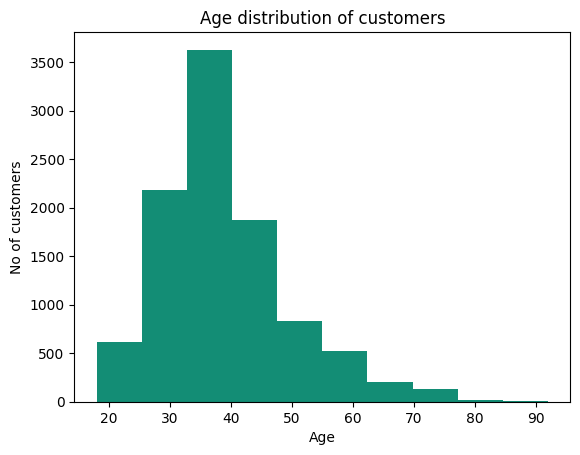

In [ ]:
df['Age'].plot(kind='hist',color='#138D75')
plt.xlabel('Age')
plt.ylabel("No of customers")
plt.title("Age distribution of customers")
plt.show()

**Majority members of bank are b/w the age 30-40**

### **GEOGRAPHY DISTRIBUTION OF CUSTOMERS**

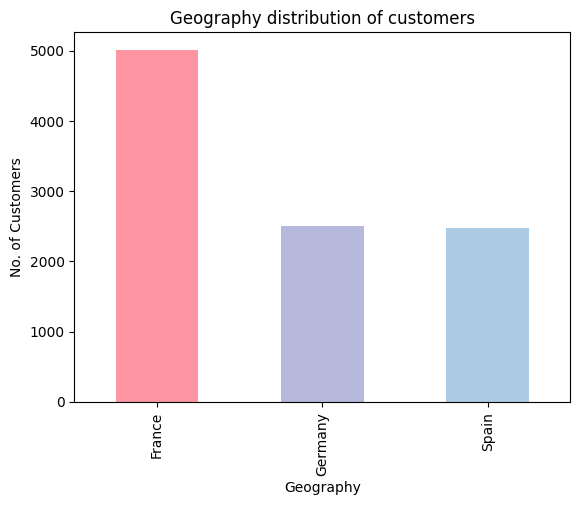

In [ ]:
c1=['#fd95a2','#b6b9db','#adcbe3']
df['Geography'].value_counts().plot(kind='bar',color=c1)
plt.xlabel("Geography")
plt.ylabel("No. of Customers")
plt.title("Geography distribution of customers")
plt.show()

**Most members are from France**

## **CUSTOMER BY GENDER**

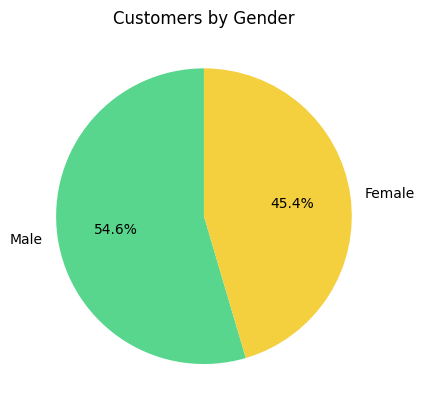

In [ ]:
gc=df['Gender'].value_counts()
gc.plot(kind='pie',autopct='%1.1f%%',startangle=90, colors=['#58D68D','#F4D03F'],labels=gc.index)
plt.title("Customers by Gender")
plt.ylabel('')
plt.show()

**Comparetively there are more male customers than female customers**

## **AVERAGE ESTIMATED SALARY BY AGE**

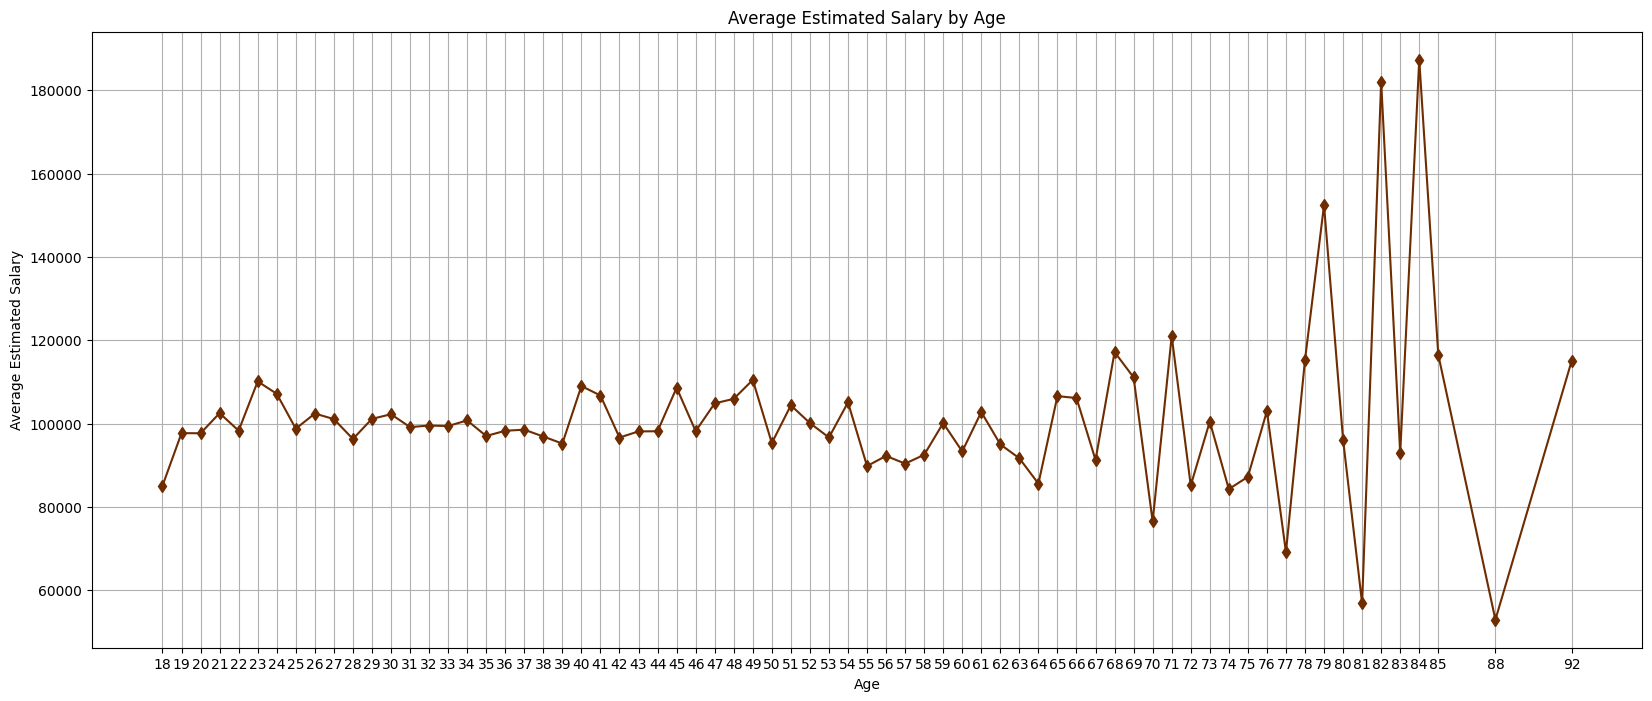

In [ ]:
avgsal = df.groupby('Age')['EstimatedSalary'].mean().reset_index()
plt.figure(figsize=(20, 8))
plt.plot(avgsal['Age'], avgsal['EstimatedSalary'], marker='d', linestyle='-', color='#6E2C00',mfc='#6E2C00')
plt.title('Average Estimated Salary by Age')
plt.xlabel('Age')
plt.ylabel('Average Estimated Salary')
plt.xticks(avgsal['Age'])
plt.grid(True)
plt.show()

**Majority people under the age of 70 have avg estimated salary b/w 80000-120000**

**PROPORTION OF ACTIVE AND EXITED MEMBERS**

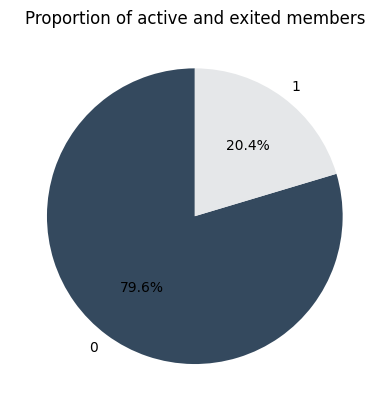

In [ ]:
gc=df['Exited'].value_counts()
gc.plot(kind='pie',autopct='%1.1f%%',startangle=90, colors=['#34495E','#E5E7E9'],labels=gc.index)
plt.title("Proportion of active and exited members")
plt.ylabel('')
plt.show()

**The ratio of existing members to exited members is almost 4:1**

**PROPORTION OF MEMBERS WITH CREDIT CARD**

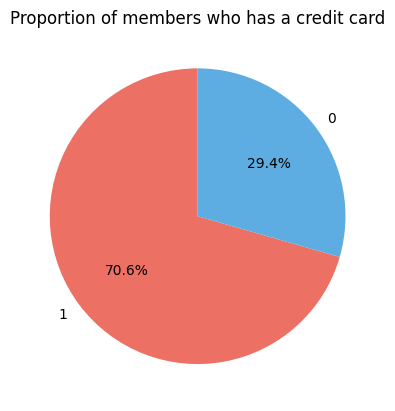

In [ ]:

gc=df['HasCrCard'].value_counts()
gc.plot(kind='pie',autopct='%1.1f%%',startangle=90, colors=['#EC7063','#5DADE2'],labels=gc.index)
plt.title("Proportion of members who has a credit card")
plt.ylabel('')
plt.show()

**About 30% of members still dont have a credit card**

**PROPORTION OF ACTIVE MEMBERS**

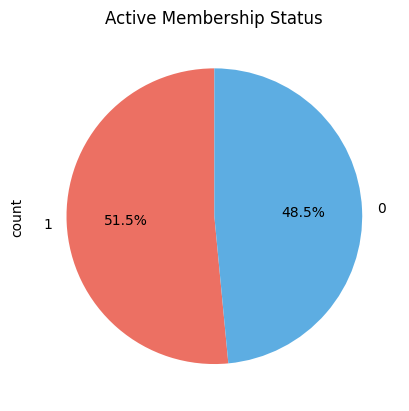

In [ ]:
df['IsActiveMember'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90, colors=['#EC7063','#5DADE2'])
plt.title('Active Membership Status')
plt.show()

**Almost half of the members have active membership**

**FREQUENCY OF CUSTOMERS FOR EACH NUMBER OF PRODUCTS**

<ipython-input-23-56dc1d439a0c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NumOfProducts', data=df, palette='rocket')


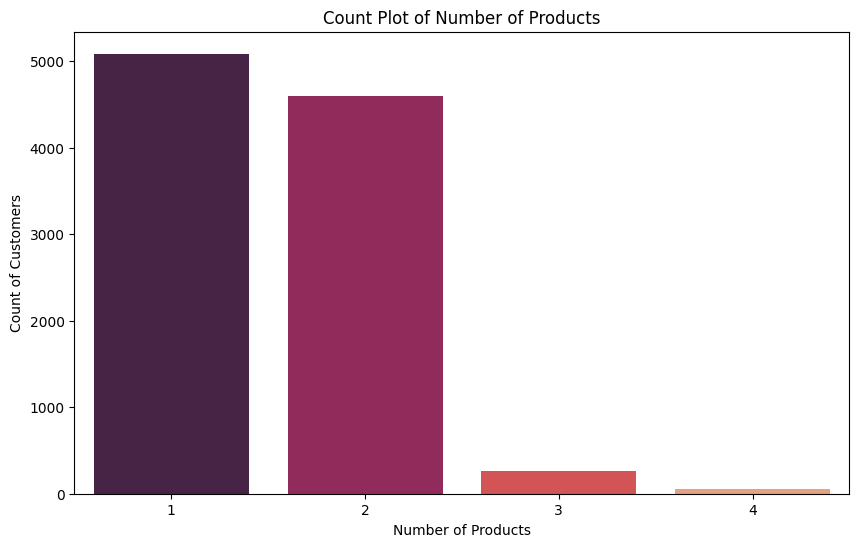

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', data=df, palette='rocket')
plt.title('Count Plot of Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count of Customers')
plt.show()

**Maximum members have only 1 product and least members uses all 4 product**

**CORELATION BETWEEN NUMERIC VALUES**

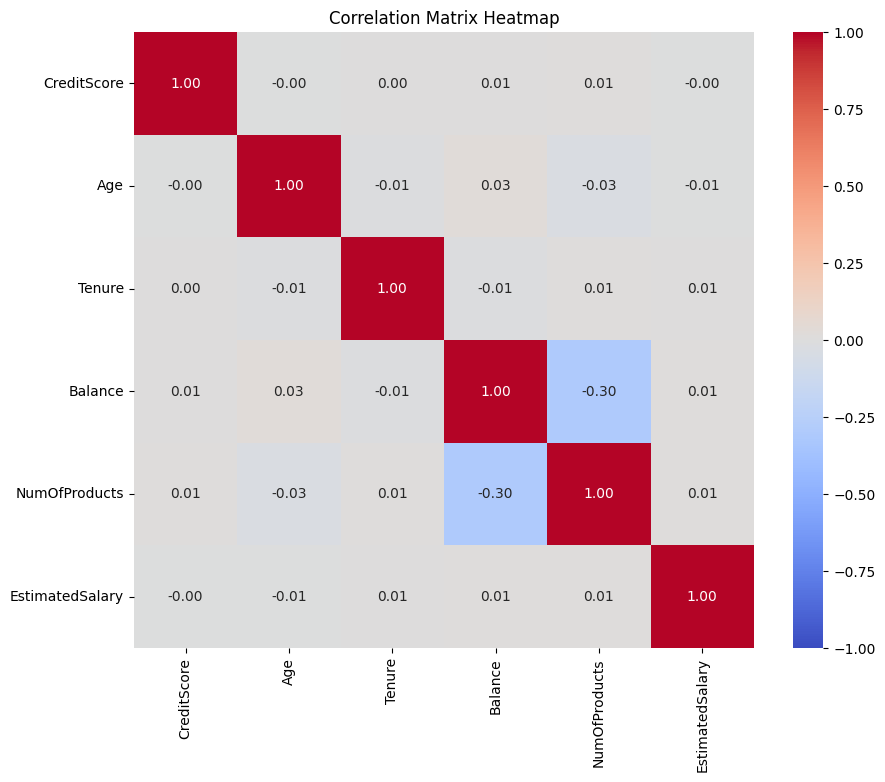

In [ ]:
correlation_matrix = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

**There is a negative relation between number of products and balance and between number of products and age which means that they have an inverse relationship**

# **TRAINING THE MODELS**

In [ ]:
y=df['Exited']

In [ ]:
x=df.drop(['Exited'],axis=1)

In [ ]:
x=pd.get_dummies(data=df, columns=['Geography', 'Gender'],dtype=int)

In [ ]:
df.shape

(10000, 11)

In [ ]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
y.tail()

,Exited
9995,0
9996,0
9997,1
9998,1
9999,0


# **SPLITTING THE DATA FOR TRAINING AND TESTING**

 **Splitting data into training and testing**

 **test_size=0.3 tells that 70% of data is used for training and rest 30% for testing**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

**Checking the shape of x_train,y_train and x_test,y_test**

In [ ]:
x_train.shape

(7000, 14)

In [ ]:
x_test.shape

(3000, 14)

In [ ]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9069,619,32,4,175406.13,2,1,1,172792.43,1,0,0,1,1,0
2603,643,34,7,160426.07,1,0,1,188533.11,0,0,1,0,1,0
7738,561,33,6,0.00,2,0,0,173680.39,0,1,0,0,0,1
1579,618,41,8,37702.79,1,1,1,195775.48,0,0,1,0,0,1
5058,714,37,9,148466.93,2,0,1,151280.96,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,0,1,0,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,0,1,0,0,1,0
5390,735,38,1,0.00,3,0,0,92220.12,1,1,0,0,1,0
860,667,43,8,190227.46,1,1,0,97508.04,1,1,0,0,0,1


In [ ]:
y_train.shape

(7000,)

In [ ]:
y_test.shape

(3000,)

## **1. LOGISTIC REGRESSION**

In [ ]:
from sklearn import linear_model
lg = linear_model.LogisticRegression()
lg.fit(x_train,y_train)
predicted_y_reg = lg.predict(x_test)
print(predicted_y_reg)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score
score =accuracy_score(y_test,predicted_y_reg)
score

0.8006666666666666

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predicted_y_reg))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2416
           1       0.44      0.09      0.15       584

    accuracy                           0.80      3000
   macro avg       0.63      0.53      0.52      3000
weighted avg       0.74      0.80      0.74      3000



## **CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import  confusion_matrix

In [ ]:
confusion_matrix(y_test,predicted_y_reg)

array([[2351,   65],
       [ 533,   51]])

**Creating a heatmap of the confusion matrix**

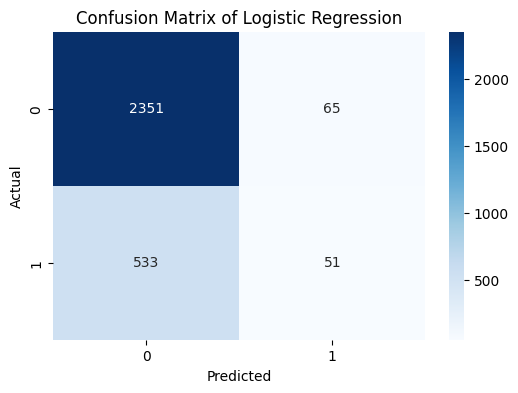

In [ ]:
conf_matrix = confusion_matrix(y_test,predicted_y_reg)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

## **2. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
predicted_y_knn=neigh.predict(x_test)
predicted_y_knn

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test, predicted_y_knn))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      2416
           1       0.21      0.12      0.16       584

    accuracy                           0.74      3000
   macro avg       0.51      0.51      0.50      3000
weighted avg       0.69      0.74      0.71      3000



**CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import  confusion_matrix

In [ ]:
confusion_matrix(y_test,predicted_y_knn)

array([[2148,  268],
       [ 512,   72]])

**Creating a heatmap of the confusion matrix**

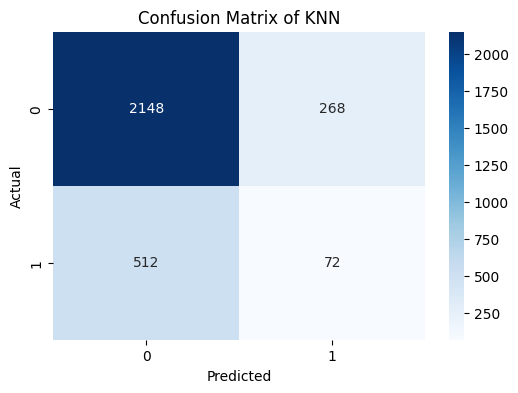

In [ ]:
conf_matrix = confusion_matrix(y_test,predicted_y_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of KNN')
plt.show()

# **3. RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model=rf_model.fit(x_train,y_train)

In [ ]:
predicted_y_rf = rf_model.predict(x_test)

In [ ]:
predicted_y_rf

array([0, 0, 0, ..., 0, 0, 0])

**CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import  confusion_matrix

In [ ]:
confusion_matrix(y_test,predicted_y_rf)

array([[2416,    0],
       [   0,  584]])

**Creating a heatmap of the confusion matrix**

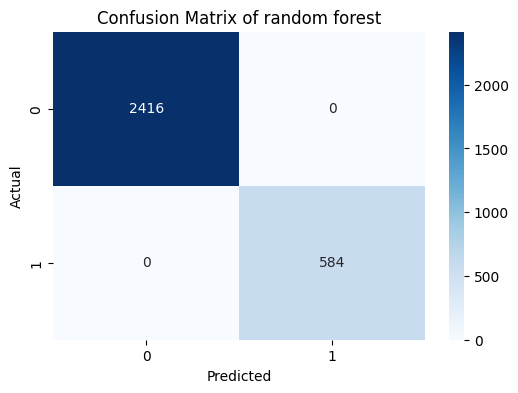

In [ ]:
conf_matrix = confusion_matrix(y_test,predicted_y_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of random forest')
plt.show()

**ACCURACY**

In [ ]:
accuracy_score(y_test,predicted_y_rf)

1.0

**CLASSIFICATION REPORT**

In [ ]:
print(classification_report(y_test,predicted_y_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       1.00      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



# **4. SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
predicted_y_svm = svm_model.predict(x_test)

In [ ]:
predicted_y_svm

array([0, 0, 0, ..., 0, 0, 0])

**CONFUSION MATRIX**

In [ ]:
confusion_matrix(y_test,predicted_y_svm)

array([[2349,   67],
       [ 554,   30]])

**Creating a heatmap of the confusion matrix**

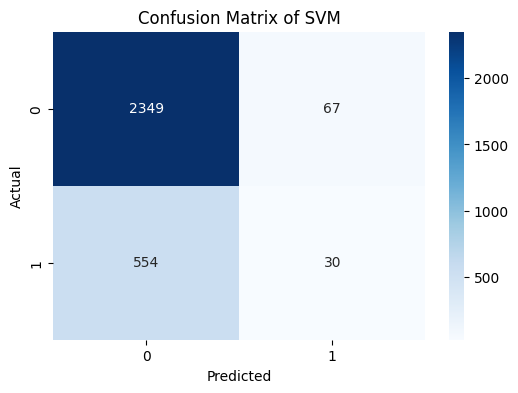

In [ ]:
conf_matrix = confusion_matrix(y_test,predicted_y_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of SVM')
plt.show()


**ACCURACY**

In [ ]:
accuracy_score(y_test,predicted_y_svm)

0.793

**CLASSIFICATION REPORT**

In [ ]:
print(classification_report(y_test,predicted_y_svm))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2416
           1       0.31      0.05      0.09       584

    accuracy                           0.79      3000
   macro avg       0.56      0.51      0.49      3000
weighted avg       0.71      0.79      0.73      3000



# **MODEL COMPARISIONS**

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report

### **COMPARING THE ACCURACY SCORES**

In [ ]:
print("      ACCURACY REPORT   ")
print("Accuracy of Logistic Regression: ",accuracy_score(y_test,predicted_y_reg))
print("Accuracy of Random Forest: ",accuracy_score(y_test,predicted_y_rf))
print("Accuracy of KNN: ",accuracy_score(y_test,predicted_y_knn))
print("Accuracy of SVM: ",accuracy_score(y_test,predicted_y_svm))

      ACCURACY REPORT   
Accuracy of Logistic Regression:  0.8006666666666666
Accuracy of Random Forest:  1.0
Accuracy of KNN:  0.74
Accuracy of SVM:  0.793


### **COMPARING THE CLASSIFICATION REPORTS**

In [ ]:
print("Classification Report for Logistic Regression: \n", classification_report(y_test, predicted_y_reg))
print("\nClassification Report for Random Forest: \n", classification_report(y_test, predicted_y_rf))
print("\nClassification Report for KNN: \n", classification_report(y_test, predicted_y_knn))
print("\nClassification Report for SVM: \n", classification_report(y_test,predicted_y_svm))

Classification Report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      2416
           1       0.44      0.09      0.15       584

    accuracy                           0.80      3000
   macro avg       0.63      0.53      0.52      3000
weighted avg       0.74      0.80      0.74      3000


Classification Report for Random Forest: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       1.00      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


Classification Report for KNN: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      2416
           1       0.21      0.12      0.16       584

    accuracy                           0.74      3000
 

### **PRECISION RECALL CURVE**

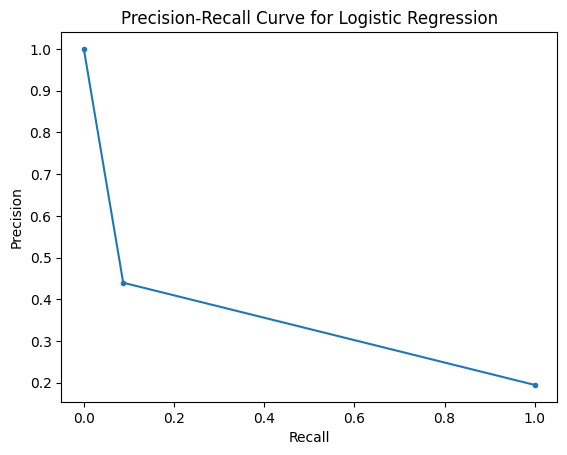

In [ ]:
#Precision-Recall Curve for Logistic Regression
precision, recall, thresholds = precision_recall_curve(y_test, predicted_y_reg)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.show()

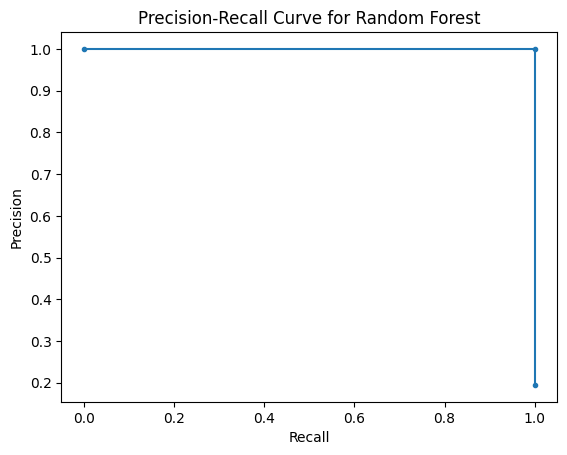

In [ ]:
#Precision-Recall Curve for Random Forest
precision, recall, thresholds = precision_recall_curve(y_test, predicted_y_rf)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.show()

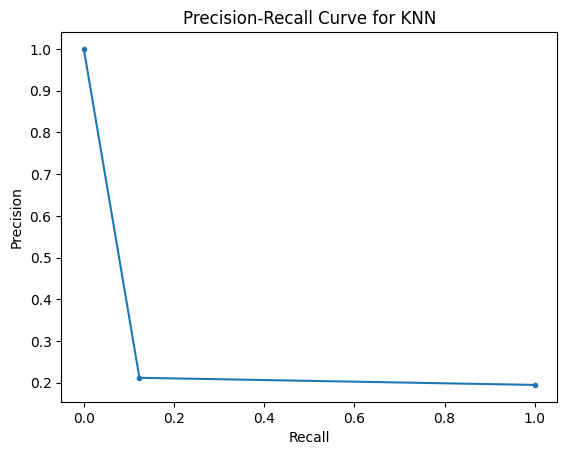

In [ ]:
#Precision Recall Curve for KNN
precision, recall, thresholds = precision_recall_curve(y_test, predicted_y_knn)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for KNN')
plt.show()

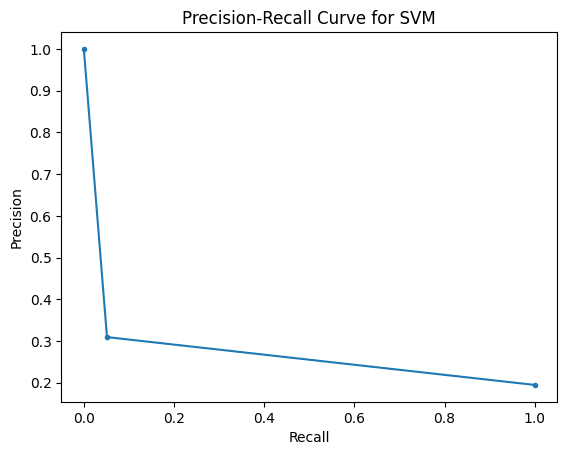

In [ ]:
#Precision Recall Curve for SVM
precision, recall, thresholds = precision_recall_curve(y_test, predicted_y_svm)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM')
plt.show()

# **CONCLUSION**

### **We observe the following conclusion:**

**ACCURACY SCORE  OF RANDOM FOREST IS HIGHEST**